# Difference in Differences with `pymc` models

In [1]:
import arviz as az
import pandas as pd
import pathlib

In [2]:
# %config InlineBackend.figure_format = 'svg'
az.style.use("arviz-darkgrid")

In [3]:
%load_ext autoreload
%autoreload 2

## Load data

In [4]:
did_data_path = pathlib.Path.cwd().parents[1] / "causalpy" / "data" / "did.csv"

df = pd.read_csv(did_data_path)

## Run the analysis

In [5]:
from causalpy.pymc_experiments import DifferenceInDifferences
from causalpy.pymc_models import LinearRegression

result = DifferenceInDifferences(
    df, formula="y ~ 1 + group + t + treated:group", prediction_model=LinearRegression()
)

Auto-assigning NUTS sampler...
Initializing NUTS using jitter+adapt_diag...
Multiprocess sampling (4 chains in 4 jobs)
NUTS: [beta, sigma]


Sampling 4 chains for 1_000 tune and 1_000 draw iterations (4_000 + 4_000 draws total) took 1 seconds.
Sampling: [beta, sigma, y_hat]
Sampling: [y_hat]


Sampling: [y_hat]


Sampling: [y_hat]


Sampling: [y_hat]


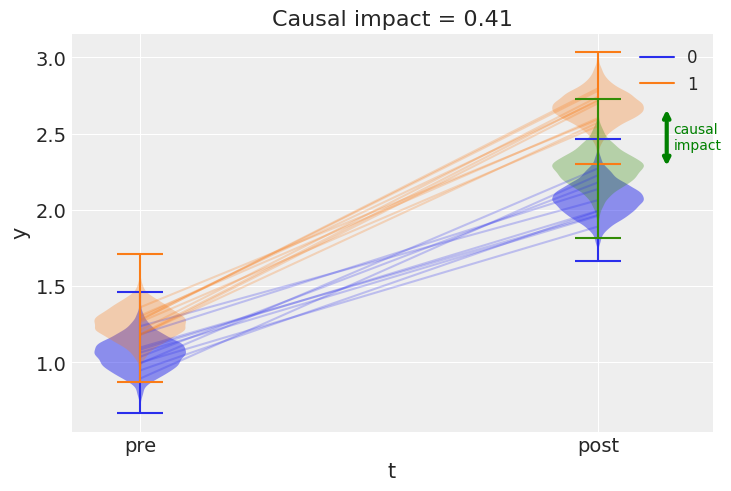

In [6]:
fig, ax = result.plot()

In [7]:
result.summary()

===========================Difference in Differences============================
Formula: y ~ 1 + group + t + treated:group
Model coefficients:
  Intercept                     1.05, 94% HDI [0.99, 1.11]
  group                         0.20, 94% HDI [0.11, 0.29]
  t                             1.02, 94% HDI [0.93, 1.10]
  treated:group                 0.41, 94% HDI [0.28, 0.53]
  sigma                         0.10, 94% HDI [0.08, 0.13]
